In [1]:
import numpy as np
from matplotlib import pyplot as plt
import cv2
import io

The RGB values of the original classification (the 23 classes):

In [2]:
color_map = [([  0,   0,   0], 19),
             ([  0,  64,   0], 14),
             ([  0, 128, 128], 22),
             ([  0, 192,   0], 16),
             ([  0, 255,   0], 10),
             ([  0, 255, 255], 21),
             ([ 51, 102,   0],  7),
             ([104,  60, 192],  1),
             ([128,   0,   0], 11),
             ([128,   0, 128], 19),
             ([128,  64,  64],  6),
             ([128, 128,   0],  8),
             ([128, 128, 128], 20),
             ([128, 128, 255], 15),
             ([192,  64,   0], 12),
             ([192, 192, 255],  2),
             ([255,   0,   0],  3),
             ([255,   0, 153], 18),
             ([255, 128,   0], 17),
             ([255, 128, 128],  9),
             ([255, 192, 128],  5),
             ([255, 192, 192], 23),
             ([255, 255,   0], 13),
             ([255, 255, 255],  0)]

The RGB values of the merged classification (the 4 classes):

0: pores + background

1: quartz

2: albite

3: clay + accessory minerals

In [3]:
color_map_1 = [([  0,   0,   0], 3),
               ([  0,  64,   0], 3),
               ([  0, 128, 128], 3),
               ([  0, 192,   0], 3),
               ([  0, 255,   0], 3),
               ([  0, 255, 255], 2),
               ([ 51, 102,   0], 3),
               ([104,  60, 192], 3),
               ([128,   0,   0], 3),
               ([128,   0, 128], 3),
               ([128,  64,  64], 3),
               ([128, 128,   0], 3),
               ([128, 128, 128], 3),
               ([128, 128, 255], 3),
               ([192,  64,   0], 3),
               ([192, 192, 255], 3),
               ([255,   0,   0], 3),
               ([255,   0, 153], 3),
               ([255, 128,   0], 3),
               ([255, 128, 128], 3),
               ([255, 192, 128], 3),
               ([255, 192, 192], 1),
               ([255, 255,   0], 3),
               ([255, 255, 255], 0)]

C:\Users\vladislav.alekseev\AppData\Local\Continuum\anaconda3\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:150: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


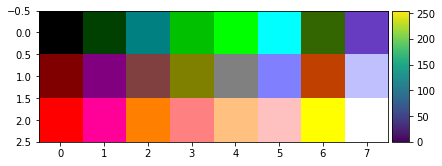

In [4]:
colors = np.array([[  0,   0,   0],
                   [  0,  64,   0],
                   [  0, 128, 128],
                   [  0, 192,   0],
                   [  0, 255,   0],
                   [  0, 255, 255],
                   [ 51, 102,   0],
                   [104,  60, 192],
                   [128,   0,   0],
                   [128,   0, 128],
                   [128,  64,  64],
                   [128, 128,   0],
                   [128, 128, 128],
                   [128, 128, 255],
                   [192,  64,   0],
                   [192, 192, 255],
                   [255,   0,   0],
                   [255,   0, 153],
                   [255, 128,   0],
                   [255, 128, 128],
                   [255, 192, 128],
                   [255, 192, 192],
                   [255, 255,   0],
                   [255, 255, 255]])

def show_palette(colors):
    from skimage import io 
    indices = np.arange(len(colors)).reshape((3, 8))
    io.imshow(colors[indices])
    
show_palette(colors)

In [7]:
import glob
from PIL import Image

for filename in glob.glob('out_final/*.png'):
    
    img = cv2.imread(filename)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img_labels = np.zeros((img.shape[0], img.shape[1]), dtype=int)
    
    for color, label in color_map_1:
    
        label_mask = np.all(img==color, axis=2)
        img_labels[label_mask] = label
    
    filename = filename[13:]
    rescaled = (255. / 3 * (img_labels - 0)).astype(np.uint8)            
    img = Image.fromarray(rescaled)
    new_filename = 'labels_1_final/' + filename
    img.save(new_filename)

In [8]:
np.unique(np.asarray(Image.open('labels_1_final/'+filename)))

array([  0,  85, 170, 255], dtype=uint8)

In [13]:
filename

'img1_r2_c9.png'

In [12]:
import glob
from PIL import Image

for filename in glob.glob('out_random/*.png'):
    
    img = cv2.imread(filename)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img_labels = np.zeros((img.shape[0], img.shape[1]), dtype=int)
    
    for color, label in color_map_1:
    
        label_mask = np.all(img==color, axis=2)
        img_labels[label_mask] = label
    
    filename = filename[13:]
    
    rescaled = (255.0 / 3 * (img_labels - 0)).astype(np.uint8)            
    img = Image.fromarray(rescaled)
    new_filename = 'labels_1_random/' + filename
    img.save(new_filename)